# Data description: 

The data is for customers of the treadmill product(s) of a retail store called Cardio Good Fitness. 
It contains the following variables 

1. Product - the model no. of the treadmill 
2. Age - in no of years, of the customer 
3. Gender - of the customer 
4. Education - in no. of years, of the customer 
5. Marital Status - of the customer 
6. Usage - Avg. # times the customer wants to use the treadmill every week 
7. Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit) 
8. Income - of the customer 
9. Miles- expected to run Explore the dataset to identify differences between customers of each product. You can also explore relationships between the different attributes of customers. You can approach it from any other line of questioning that you feel could be relevant for the business.

# Objective: 

1. Come up with a customer profile (characteristics of a customer) of the different products 
2. Perform uni-variate and multi-variate analyses 
3. Generate a set of insights and recommendations that will help the company in targeting new customers

# Key questions to be answered: 

1. Which product suits which types of customers the most? 
2. What determines a customer's preference for a certain product? 
3. What kind of potential new customers can be attracted? 


# Criteria of assessment: 

Understanding the structure of the data 

Univariate Data Analysis
Analysis of spread and distribution of every feature in the dataset.

Multivariate Data Analysis
Analysis of interaction between features, in the dataset

Quality & Use of visualisations

Conclusion and Recommendations

Well commented Python Code



### Importation of key packages and opening of the excel file 

In [50]:
# import the key packages 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [55]:
# open the excel file 
fitness = pd.read_csv("CardioGoodFitness.csv")

## Data Summary: understanding the structure of the data 

In [8]:
# how many data points and features ? 
print (fitness.shape)

(180, 9)


The dataset has 180 rows of observations and 9 columns.

In [40]:
# what are the different variable names ?
fitness.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [39]:
# what are the data types for the different variables ? 

fitness.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [111]:
fitness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


## Univariate Analysis: spread & distribution of key data points 

In [46]:
# key stats of Age groups 
fitness.Age.describe()

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

In [47]:
# key stats of Income level 
fitness.Income.describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

In [48]:
# key stats of Education level 
fitness.Education.describe()

count    180.000000
mean      15.572222
std        1.617055
min       12.000000
25%       14.000000
50%       16.000000
75%       16.000000
max       21.000000
Name: Education, dtype: float64

In [149]:
# key stats of miles 
fitness.Miles.describe()

count   180.00000
mean    103.19444
std      51.86360
min      21.00000
25%      66.00000
50%      94.00000
75%     114.75000
max     360.00000
Name: Miles, dtype: float64

In [19]:
fitness.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [20]:
fitness.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [151]:
# a random sampling sorted by age 

fitness.sample(5).sort_values('Age', ascending= True)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
82,TM498,20,Female,14,Partnered,3,3,34110,106
26,TM195,24,Female,16,Single,4,3,46617,75
33,TM195,25,Male,16,Single,3,3,43206,85
163,TM798,28,Male,18,Partnered,7,5,77191,180
139,TM498,48,Male,16,Partnered,2,3,57987,64


In [33]:
# what are the models of treadmills and their usage? 
fitness['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

Observation: TM195 has twice as many users as TM793, the data is thus not balanced, with vastly different amount of users for each model, showing there might be a clear preference for different target groups 

In [152]:
fitness.pivot_table(fitness, index = 'Product')

,Age,Education,Fitness,Income,Miles,Usage
Product,,,,,,
TM195,28.55000,15.03750,2.96250,46418.02500,82.78750,3.08750
TM498,28.90000,15.11667,2.90000,48973.65000,87.93333,3.06667
TM798,29.10000,17.32500,4.62500,75441.57500,166.90000,4.77500


Observations for the average stats of the different products:
1. Avg age for the three products is similar 
2. TM798 users tend to have higher number of years for education 
3. TM798 users are significantly fitter in their own opinion, while there is not much difference for TM195 and TM498
4. TM195 and TM498 users tend to have similar income levels, but TM798 users have significantly higher income
5. Users spend more than twice amount of time on TM798 than the other two models
6. TM195 and TM498 use the treadmills 3 days per week on average, while TM798 exercise nearly for 5 days per week 

Mini conclusion: 
Very clear comparison of the average of the different stats compared against the different three products, with TM195 and TM498 having very similar stats, but differing vastly from TM798 in all categories except age. 

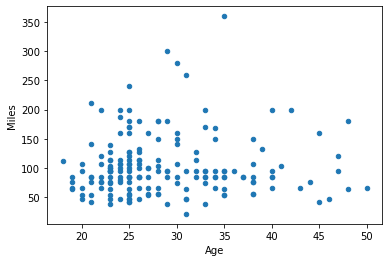

In [26]:
# how age affects the number of miles tracked 
fitness.plot(kind='scatter', x='Age', y='Miles');
plt.show()

Observation: fairly equally distributed across the ages in terms of miles used 

In [62]:
# gender comparison of the users 
fitness['Gender'].value_counts()
# there are significant more male users than females, also an unbalanced data 

Male      104
Female     76
Name: Gender, dtype: int64

In [63]:
# the perception of fitness based on user's own rating, 5=fittest, 1=unfit 
fitness['Fitness'].value_counts()
# majority of the users consider themselves to be of median fitness 

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='Count'>

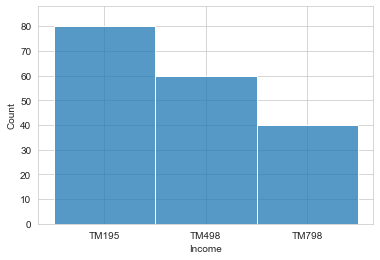

In [113]:
sns.rugplot(data = fitness, x = 'Income');
sns.histplot(fitness.Product)

<AxesSubplot:xlabel='Education', ylabel='Count'>

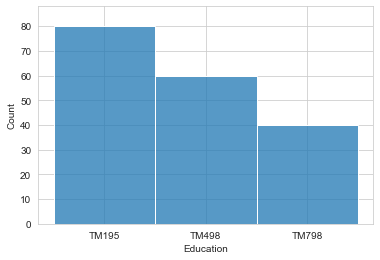

In [114]:
sns.rugplot(data = fitness, x = 'Education');
sns.histplot(fitness.Product)

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

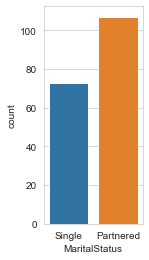

In [138]:
plt.subplot(1,3,2)
sns.countplot(data=fitness,x='MaritalStatus')

## Multivariate Analysis: relationship between the different variables 

In [107]:
correlation = fitness.corr()
correlation

,Age,Education,Usage,Fitness,Income,Miles
Age,1.00000,0.28050,0.01506,0.06110,0.51341,0.03662
Education,0.28050,1.00000,0.39516,0.41058,0.62583,0.30728
Usage,0.01506,0.39516,1.00000,0.66861,0.51954,0.75913
Fitness,0.06110,0.41058,0.66861,1.00000,0.53501,0.78570
Income,0.51341,0.62583,0.51954,0.53501,1.00000,0.54347
Miles,0.03662,0.30728,0.75913,0.78570,0.54347,1.00000


In [57]:
fitness.skew()

Age         0.98216
Education   0.62229
Usage       0.73949
Fitness     0.45480
Income      1.29178
Miles       1.72450
dtype: float64

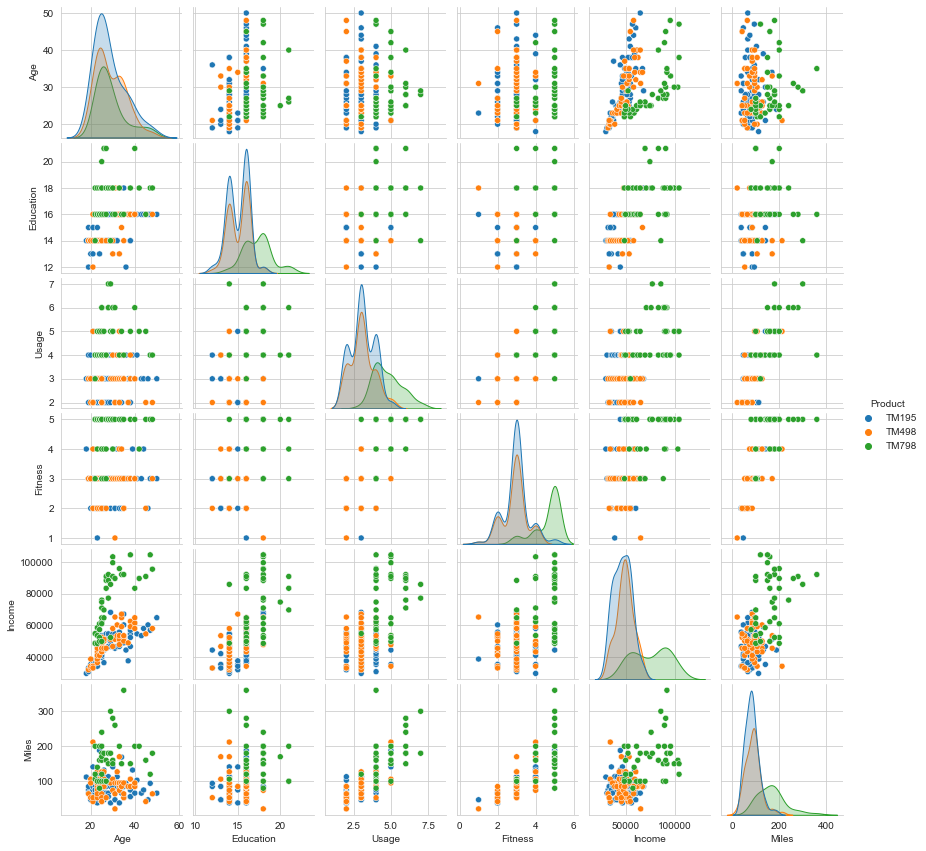

In [54]:
# pair plot of all the variables 

plt.close();
sns.set_style("whitegrid");
sns.pairplot(fitness, hue="Product", height=2);
plt.show()

### Insights from the pair plot: 
    
1. the higher the income of the user, the higher the tendency to select TM796. 
2. older users have higher income, and thus higher tendency of using TM796 too. 
3. the higher income users tend to spend more time on TM796, with greater miles than users using the other two models. 
4. it also seems that users choosing TM796 tend to be more educated.

<AxesSubplot:>

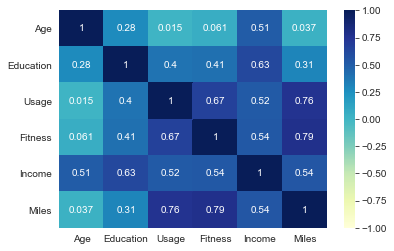

In [59]:
sns.heatmap(correlation, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)

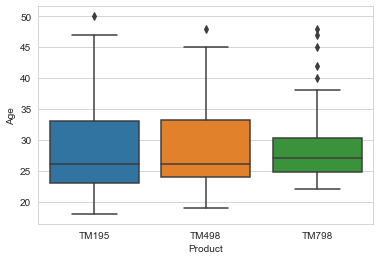

In [49]:
sns.boxplot(x='Product',y='Age', data=fitness)
plt.show()

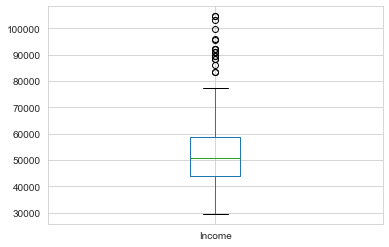

In [183]:
fitness.boxplot(column = ['Income']);

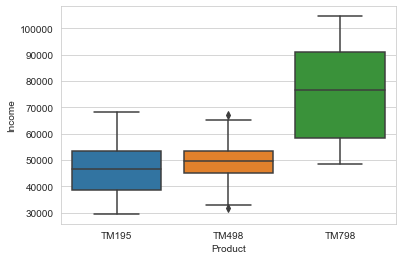

In [51]:
sns.boxplot(x='Product',y='Income', data=fitness)
plt.show()

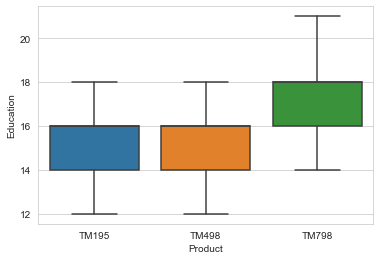

In [55]:
sns.boxplot(x='Product',y='Education', data=fitness)
plt.show()

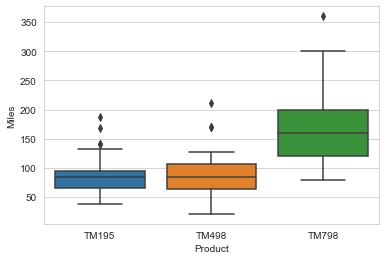

In [56]:
sns.boxplot(x='Product',y='Miles', data=fitness)
plt.show()

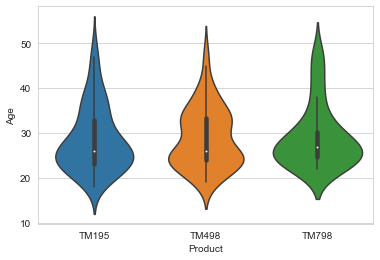

In [57]:
sns.violinplot(x="Product", y="Age", data=fitness, size=8)
plt.show()

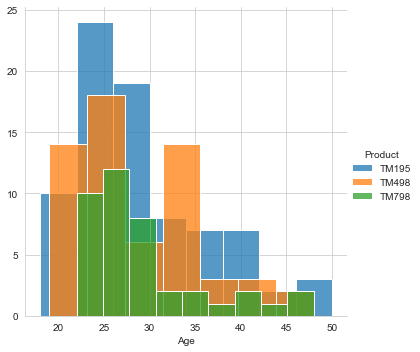

In [108]:
sns.FacetGrid(fitness, hue="Product", height=5) \
   .map(sns.histplot, "Age") \
   .add_legend();
plt.show();

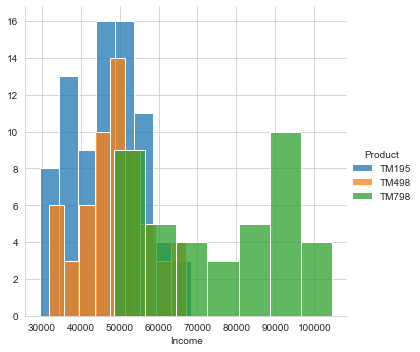

In [77]:
sns.FacetGrid(fitness, hue="Product", height=5) \
   .map(sns.histplot, "Income") \
   .add_legend();
plt.show();


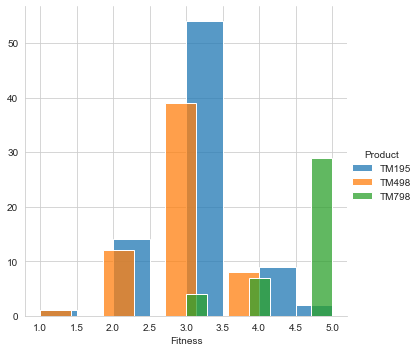

In [109]:
sns.FacetGrid(fitness, hue="Product", height=5) \
   .map(sns.histplot, "Fitness") \
   .add_legend();
plt.show();

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '12'),
  Text(1, 0, '13'),
  Text(2, 0, '14'),
  Text(3, 0, '15'),
  Text(4, 0, '16'),
  Text(5, 0, '18'),
  Text(6, 0, '20'),
  Text(7, 0, '21')])

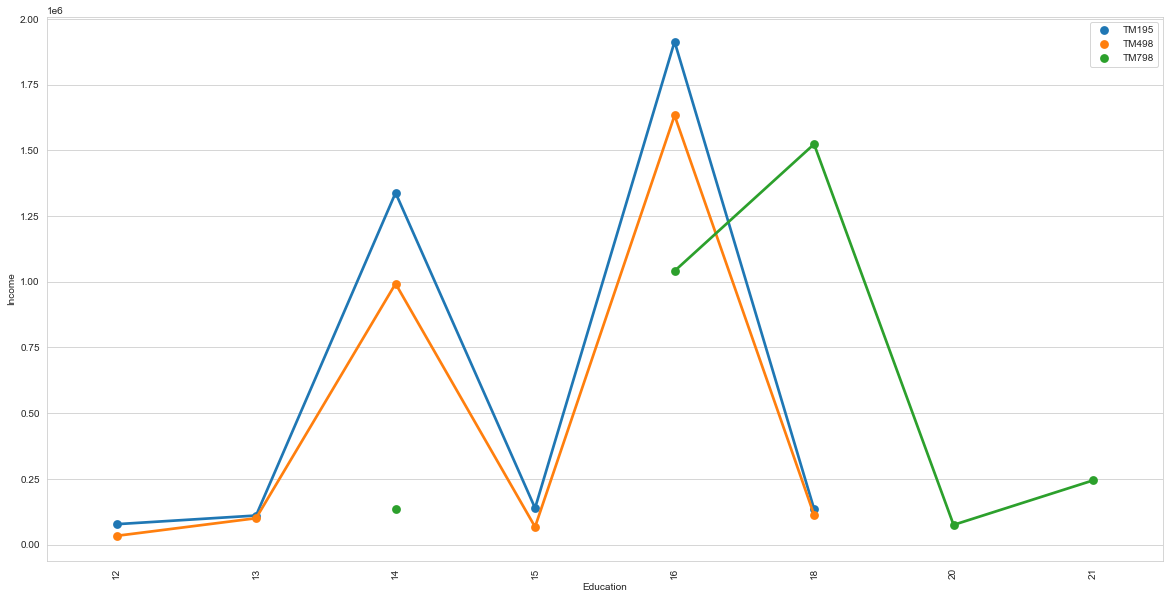

In [110]:
plt.figure(figsize = (20,10)) 
sns.pointplot(x='Education', y='Income', data=fitness, estimator=sum, ci=None, hue = 'Product')
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=90) 

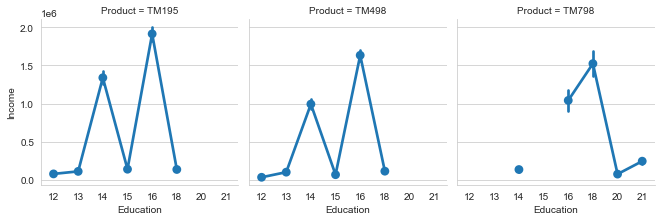

In [122]:
sns.catplot(x='Education', y='Income', data=fitness,
                estimator=sum, col='Product', kind="point",
                height=3,col_wrap = 4 )

<AxesSubplot:xlabel='Fitness', ylabel='Miles'>

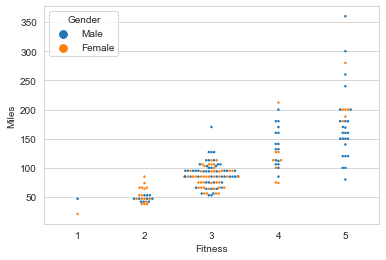

In [127]:
sns.swarmplot(x='Fitness',y='Miles',data=fitness,size=2.5,hue='Gender')

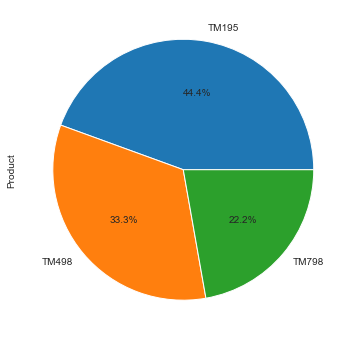

In [145]:
plt.figure(figsize=(12,5))
fitness['Product'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(6,6))
plt.show()

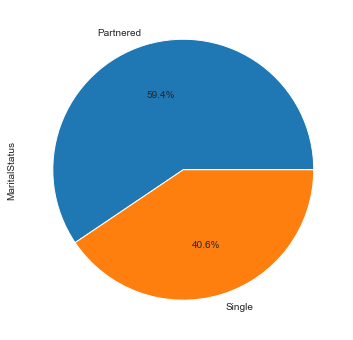

In [144]:
plt.figure(figsize=(12,5))
fitness['MaritalStatus'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(6,6))
plt.show()

Gender   Female  Male
Product              
TM195        40    40
TM498        29    31
TM798         7    33


<Figure size 720x720 with 0 Axes>

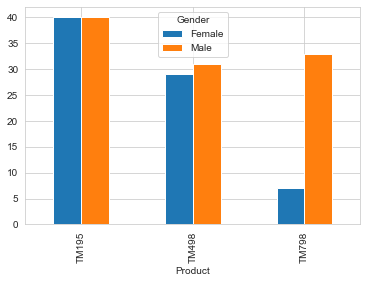

In [146]:
plt.figure(figsize=(10,10))
prd_gender=pd.crosstab(fitness['Product'],fitness['Gender'] )
print(prd_gender)

ax=prd_gender.plot(kind='bar')



<AxesSubplot:xlabel='Product'>

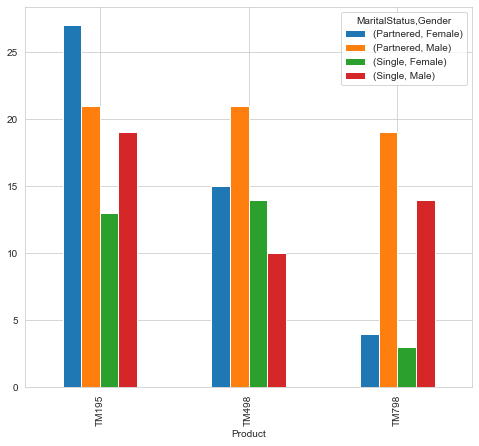

In [148]:
maritalstaus_gender= pd.crosstab(index=fitness["Product"], 
                             columns=[fitness["MaritalStatus"],
                                      fitness["Gender"]] ,
                             )  

maritalstaus_gender.plot(kind='bar',figsize=(8,7))

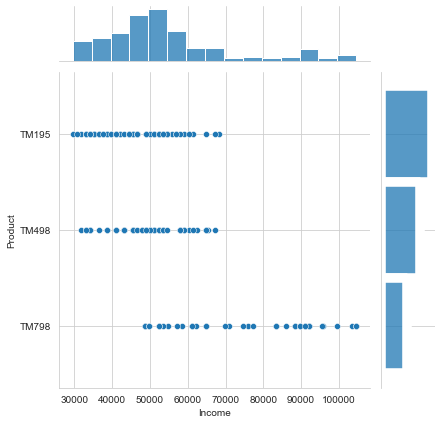

In [155]:
sns.jointplot(data = fitness, x = 'Income', y = 'Product');

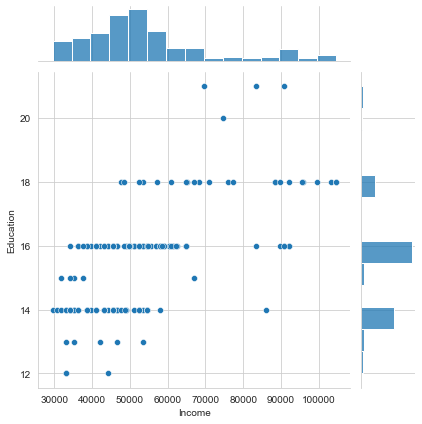

In [159]:
sns.jointplot(data = fitness, x = 'Income', y = 'Education');

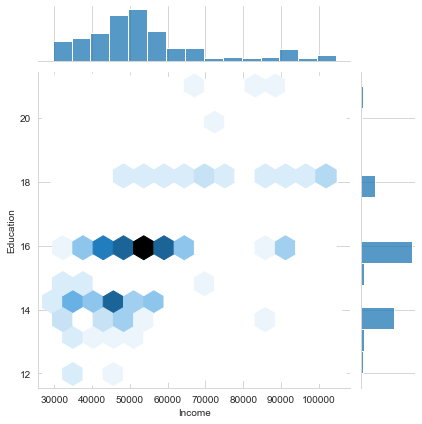

In [164]:
sns.jointplot(data = fitness, x = 'Income', y = 'Education', kind="hex");

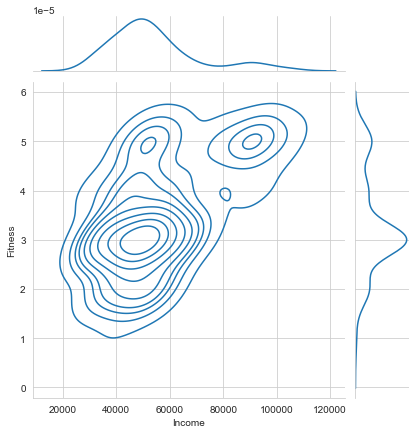

In [168]:
sns.jointplot(data = fitness, x= 'Income', y = 'Fitness', kind="kde");

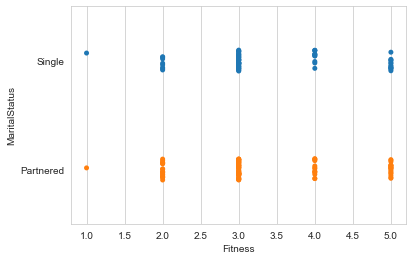

In [170]:
sns.stripplot(data = fitness, x = 'Fitness', y='MaritalStatus', jitter=True);

Observation: Singles seem to deem themselves as healthier than the partnered counterparts 

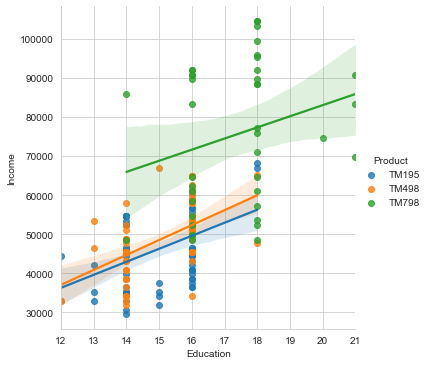

In [182]:
sns.lmplot(y="Income", x="Education", hue="Product", data=fitness);

## Customer Profile 

## TM195 

1. Popularity: 44.4% (most affordable) 
2. Males: 40, Females: 40 (same appeal) 
3. Income: $46418 (lower) 
4. Usage: 3 times per week 
5. Marital status: partnered users > single users for both genders, but least popular with single females 


## TM498

1. Popularity: 33.3% (mid range) 
2. Males: 29, Females: 31 (non-gender specific) 
3. Income: $48974 (mid-market)
4. Usage: 3 times per week 
5. Marital status: partnered users > single users for both genders, but least popular with single males 

## TM7981

1. Popularity: 22.2% (high-end) 
2. Males: 33, Females: 7 (predominently gender-selective) 
3. Income: $75442 (especially income-sensitive) 
4. Usage: nearly 5 times per week (sports active) 
5. Marital status: males > females (predonimently gender specific), with more for partnered for both genders 

### Conclusion 

1. There are clear trends with the types of customers that opt for the different treadmill models. 
2. Income, education levels seem to correlate with the selection of model. 
3. Marriage status has less influence on selection for certain models than the others 
3. Some models are are used more in terms of miles and frequency per week than others, so the amount of time spent on the different models varies, with the mostly used model being TM798 for both parameters.

### Recommendations 

1. Target high-income earners and the highly-educated professionals for the TM798 model, as a high-end option that shows status. Also as a sporty model for the more athletically inclined. 
2. The most popular model is TM195, thus should be marketed on a large scale as the most accessible and easy to use model, with no barriers in terms of fitness or time spent on it 
3. The strategy for marketing TM498 does not differ much from TM195, as both have very similar user stats 
4. For TM195 and TM498, gender does not make a difference. However, for TM798, users are predonimently males, thus should have a bigger focus on marketing to the male clients, especially those who are married. 
5. In general, married males buy and use treadmills more than females or singles, thus focus should zoom on the married males for all three products. However, there could be campaigns to promote treadmills as a good workout for females, whether married or not 